In [62]:
!python -V

Python 3.9.12


In [147]:
import pandas as pd 
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [64]:
df=pd.read_parquet("https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-02.parquet")

In [65]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2021-02-01 00:34:03,2021-02-01 00:51:58,N,1.0,130,205,5.0,3.66,14.00,0.50,0.5,10.00,0.0,None,0.3,25.30,1.0,1.0,0.00
1,2,2021-02-01 00:04:00,2021-02-01 00:10:30,N,1.0,152,244,1.0,1.10,6.50,0.50,0.5,0.00,0.0,None,0.3,7.80,2.0,1.0,0.00
2,2,2021-02-01 00:18:51,2021-02-01 00:34:06,N,1.0,152,48,1.0,4.93,16.50,0.50,0.5,0.00,0.0,None,0.3,20.55,2.0,1.0,2.75
3,2,2021-02-01 00:53:27,2021-02-01 01:11:41,N,1.0,152,241,1.0,6.70,21.00,0.50,0.5,0.00,0.0,None,0.3,22.30,2.0,1.0,0.00
4,2,2021-02-01 00:57:46,2021-02-01 01:06:44,N,1.0,75,42,1.0,1.89,8.50,0.50,0.5,2.45,0.0,None,0.3,12.25,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64567,2,2021-02-28 22:19:00,2021-02-28 22:29:00,None,NaN,129,7,NaN,2.63,10.04,0.00,0.0,0.00,0.0,None,0.3,10.34,NaN,NaN,NaN
64568,2,2021-02-28 23:18:00,2021-02-28 23:27:00,None,NaN,116,166,NaN,1.87,8.33,0.00,0.0,1.89,0.0,None,0.3,10.52,NaN,NaN,NaN
64569,2,2021-02-28 23:44:00,2021-02-28 23:58:00,None,NaN,74,151,NaN,2.40,12.61,0.00,0.0,0.00,0.0,None,0.3,12.91,NaN,NaN,NaN
64570,2,2021-02-28 23:07:00,2021-02-28 23:14:00,None,NaN,42,42,NaN,1.11,11.95,2.75,0.0,0.00,0.0,None,0.3,15.00,NaN,NaN,NaN


In [66]:
#df = df[df.trip_type==2]

Findin the duration of the trip 

In [67]:
# df.lpep_pickup_datetime - df.lpep_dropoff_datetime - show error because of the string

In [68]:
# so convert the col into pd.datetime 
df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)

In [69]:
df.lpep_dropoff_datetime - df.lpep_pickup_datetime

0       0 days 00:17:55
1       0 days 00:06:30
2       0 days 00:15:15
3       0 days 00:18:14
4       0 days 00:08:58
              ...      
64567   0 days 00:10:00
64568   0 days 00:09:00
64569   0 days 00:14:00
64570   0 days 00:07:00
64571   0 days 00:07:00
Length: 64572, dtype: timedelta64[ns]

In [70]:
df['duration']=df.lpep_dropoff_datetime - df.lpep_pickup_datetime

In [71]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2021-02-01 00:34:03,2021-02-01 00:51:58,N,1.0,130,205,5.0,3.66,14.00,...,0.5,10.00,0.0,None,0.3,25.30,1.0,1.0,0.00,0 days 00:17:55
1,2,2021-02-01 00:04:00,2021-02-01 00:10:30,N,1.0,152,244,1.0,1.10,6.50,...,0.5,0.00,0.0,None,0.3,7.80,2.0,1.0,0.00,0 days 00:06:30
2,2,2021-02-01 00:18:51,2021-02-01 00:34:06,N,1.0,152,48,1.0,4.93,16.50,...,0.5,0.00,0.0,None,0.3,20.55,2.0,1.0,2.75,0 days 00:15:15
3,2,2021-02-01 00:53:27,2021-02-01 01:11:41,N,1.0,152,241,1.0,6.70,21.00,...,0.5,0.00,0.0,None,0.3,22.30,2.0,1.0,0.00,0 days 00:18:14
4,2,2021-02-01 00:57:46,2021-02-01 01:06:44,N,1.0,75,42,1.0,1.89,8.50,...,0.5,2.45,0.0,None,0.3,12.25,1.0,1.0,0.00,0 days 00:08:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64567,2,2021-02-28 22:19:00,2021-02-28 22:29:00,None,NaN,129,7,NaN,2.63,10.04,...,0.0,0.00,0.0,None,0.3,10.34,NaN,NaN,NaN,0 days 00:10:00
64568,2,2021-02-28 23:18:00,2021-02-28 23:27:00,None,NaN,116,166,NaN,1.87,8.33,...,0.0,1.89,0.0,None,0.3,10.52,NaN,NaN,NaN,0 days 00:09:00
64569,2,2021-02-28 23:44:00,2021-02-28 23:58:00,None,NaN,74,151,NaN,2.40,12.61,...,0.0,0.00,0.0,None,0.3,12.91,NaN,NaN,NaN,0 days 00:14:00
64570,2,2021-02-28 23:07:00,2021-02-28 23:14:00,None,NaN,42,42,NaN,1.11,11.95,...,0.0,0.00,0.0,None,0.3,15.00,NaN,NaN,NaN,0 days 00:07:00


In [72]:
# convert the duration into minutes

In [73]:
# taking the first row val
td=df.duration.iloc[0]

In [74]:
# seeing the row in seconds and converting it into the min
td.total_seconds() / 60

17.916666666666668

In [75]:
#apply it to all other row in duration
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

In [76]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2021-02-01 00:34:03,2021-02-01 00:51:58,N,1.0,130,205,5.0,3.66,14.00,...,0.5,10.00,0.0,None,0.3,25.30,1.0,1.0,0.00,17.916667
1,2,2021-02-01 00:04:00,2021-02-01 00:10:30,N,1.0,152,244,1.0,1.10,6.50,...,0.5,0.00,0.0,None,0.3,7.80,2.0,1.0,0.00,6.500000
2,2,2021-02-01 00:18:51,2021-02-01 00:34:06,N,1.0,152,48,1.0,4.93,16.50,...,0.5,0.00,0.0,None,0.3,20.55,2.0,1.0,2.75,15.250000
3,2,2021-02-01 00:53:27,2021-02-01 01:11:41,N,1.0,152,241,1.0,6.70,21.00,...,0.5,0.00,0.0,None,0.3,22.30,2.0,1.0,0.00,18.233333
4,2,2021-02-01 00:57:46,2021-02-01 01:06:44,N,1.0,75,42,1.0,1.89,8.50,...,0.5,2.45,0.0,None,0.3,12.25,1.0,1.0,0.00,8.966667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64567,2,2021-02-28 22:19:00,2021-02-28 22:29:00,None,NaN,129,7,NaN,2.63,10.04,...,0.0,0.00,0.0,None,0.3,10.34,NaN,NaN,NaN,10.000000
64568,2,2021-02-28 23:18:00,2021-02-28 23:27:00,None,NaN,116,166,NaN,1.87,8.33,...,0.0,1.89,0.0,None,0.3,10.52,NaN,NaN,NaN,9.000000
64569,2,2021-02-28 23:44:00,2021-02-28 23:58:00,None,NaN,74,151,NaN,2.40,12.61,...,0.0,0.00,0.0,None,0.3,12.91,NaN,NaN,NaN,14.000000
64570,2,2021-02-28 23:07:00,2021-02-28 23:14:00,None,NaN,42,42,NaN,1.11,11.95,...,0.0,0.00,0.0,None,0.3,15.00,NaN,NaN,NaN,7.000000


In [77]:
#df = df[df.trip_type==2]

In [78]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2021-02-01 00:34:03,2021-02-01 00:51:58,N,1.0,130,205,5.0,3.66,14.00,...,0.5,10.00,0.0,None,0.3,25.30,1.0,1.0,0.00,17.916667
1,2,2021-02-01 00:04:00,2021-02-01 00:10:30,N,1.0,152,244,1.0,1.10,6.50,...,0.5,0.00,0.0,None,0.3,7.80,2.0,1.0,0.00,6.500000
2,2,2021-02-01 00:18:51,2021-02-01 00:34:06,N,1.0,152,48,1.0,4.93,16.50,...,0.5,0.00,0.0,None,0.3,20.55,2.0,1.0,2.75,15.250000
3,2,2021-02-01 00:53:27,2021-02-01 01:11:41,N,1.0,152,241,1.0,6.70,21.00,...,0.5,0.00,0.0,None,0.3,22.30,2.0,1.0,0.00,18.233333
4,2,2021-02-01 00:57:46,2021-02-01 01:06:44,N,1.0,75,42,1.0,1.89,8.50,...,0.5,2.45,0.0,None,0.3,12.25,1.0,1.0,0.00,8.966667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64567,2,2021-02-28 22:19:00,2021-02-28 22:29:00,None,NaN,129,7,NaN,2.63,10.04,...,0.0,0.00,0.0,None,0.3,10.34,NaN,NaN,NaN,10.000000
64568,2,2021-02-28 23:18:00,2021-02-28 23:27:00,None,NaN,116,166,NaN,1.87,8.33,...,0.0,1.89,0.0,None,0.3,10.52,NaN,NaN,NaN,9.000000
64569,2,2021-02-28 23:44:00,2021-02-28 23:58:00,None,NaN,74,151,NaN,2.40,12.61,...,0.0,0.00,0.0,None,0.3,12.91,NaN,NaN,NaN,14.000000
64570,2,2021-02-28 23:07:00,2021-02-28 23:14:00,None,NaN,42,42,NaN,1.11,11.95,...,0.0,0.00,0.0,None,0.3,15.00,NaN,NaN,NaN,7.000000


/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

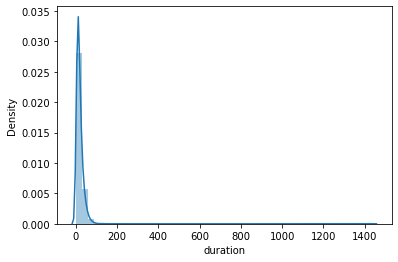

In [79]:
# seeing the distribution of the duration  
sns.distplot(df.duration)

In [80]:
# describe the col ( duration )
df.duration.describe()

count    64572.000000
mean        20.978724
std         53.167437
min          0.000000
25%          8.516667
50%         14.825000
75%         24.950000
max       1439.616667
Name: duration, dtype: float64

In [81]:
# adding more filter to this 
df.duration.describe(percentiles= [0.95, 0.98, 0.99])

count    64572.000000
mean        20.978724
std         53.167437
min          0.000000
50%         14.825000
95%         49.000000
98%         63.000000
99%         75.204833
max       1439.616667
Name: duration, dtype: float64

In [82]:
# more sorting of data
(df.duration >= 1.0) & (df.duration <= 60)

0        True
1        True
2        True
3        True
4        True
         ... 
64567    True
64568    True
64569    True
64570    True
64571    True
Name: duration, Length: 64572, dtype: bool

In [83]:
# finding how much data include in this filter 
((df.duration >= 1.0) & (df.duration <= 62)).mean()

0.9617945858886204

In [84]:
df=df[(df.duration >= 1.0) & (df.duration <= 62)]
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2021-02-01 00:34:03,2021-02-01 00:51:58,N,1.0,130,205,5.0,3.66,14.00,...,0.5,10.00,0.0,None,0.3,25.30,1.0,1.0,0.00,17.916667
1,2,2021-02-01 00:04:00,2021-02-01 00:10:30,N,1.0,152,244,1.0,1.10,6.50,...,0.5,0.00,0.0,None,0.3,7.80,2.0,1.0,0.00,6.500000
2,2,2021-02-01 00:18:51,2021-02-01 00:34:06,N,1.0,152,48,1.0,4.93,16.50,...,0.5,0.00,0.0,None,0.3,20.55,2.0,1.0,2.75,15.250000
3,2,2021-02-01 00:53:27,2021-02-01 01:11:41,N,1.0,152,241,1.0,6.70,21.00,...,0.5,0.00,0.0,None,0.3,22.30,2.0,1.0,0.00,18.233333
4,2,2021-02-01 00:57:46,2021-02-01 01:06:44,N,1.0,75,42,1.0,1.89,8.50,...,0.5,2.45,0.0,None,0.3,12.25,1.0,1.0,0.00,8.966667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64567,2,2021-02-28 22:19:00,2021-02-28 22:29:00,None,NaN,129,7,NaN,2.63,10.04,...,0.0,0.00,0.0,None,0.3,10.34,NaN,NaN,NaN,10.000000
64568,2,2021-02-28 23:18:00,2021-02-28 23:27:00,None,NaN,116,166,NaN,1.87,8.33,...,0.0,1.89,0.0,None,0.3,10.52,NaN,NaN,NaN,9.000000
64569,2,2021-02-28 23:44:00,2021-02-28 23:58:00,None,NaN,74,151,NaN,2.40,12.61,...,0.0,0.00,0.0,None,0.3,12.91,NaN,NaN,NaN,14.000000
64570,2,2021-02-28 23:07:00,2021-02-28 23:14:00,None,NaN,42,42,NaN,1.11,11.95,...,0.0,0.00,0.0,None,0.3,15.00,NaN,NaN,NaN,7.000000


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62105 entries, 0 to 64571
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               62105 non-null  int64         
 1   lpep_pickup_datetime   62105 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  62105 non-null  datetime64[ns]
 3   store_and_fwd_flag     33440 non-null  object        
 4   RatecodeID             33440 non-null  float64       
 5   PULocationID           62105 non-null  int64         
 6   DOLocationID           62105 non-null  int64         
 7   passenger_count        33440 non-null  float64       
 8   trip_distance          62105 non-null  float64       
 9   fare_amount            62105 non-null  float64       
 10  extra                  62105 non-null  float64       
 11  mta_tax                62105 non-null  float64       
 12  tip_amount             62105 non-null  float64       
 13  t

In [87]:
# trying to find out the categorical and numerical values 
categorical=['PULocationID','DOLocationID']
numerical=['trip_distance']

In [90]:
df[categorical].dtypes

PULocationID    int64
DOLocationID    int64
dtype: object

In [91]:
#changing categorical into string 
df[categorical] = df[categorical].astype(str)

/tmp/ipykernel_3871/3902978774.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical] = df[categorical].astype(str)


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62105 entries, 0 to 64571
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               62105 non-null  int64         
 1   lpep_pickup_datetime   62105 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  62105 non-null  datetime64[ns]
 3   store_and_fwd_flag     33440 non-null  object        
 4   RatecodeID             33440 non-null  float64       
 5   PULocationID           62105 non-null  object        
 6   DOLocationID           62105 non-null  object        
 7   passenger_count        33440 non-null  float64       
 8   trip_distance          62105 non-null  float64       
 9   fare_amount            62105 non-null  float64       
 10  extra                  62105 non-null  float64       
 11  mta_tax                62105 non-null  float64       
 12  tip_amount             62105 non-null  float64       
 13  t

In [96]:
#convert the first 10 rows into dict
df[categorical + numerical].iloc[:10].to_dict(orient="records")

[{'PULocationID': '130', 'DOLocationID': '205', 'trip_distance': 3.66},
 {'PULocationID': '152', 'DOLocationID': '244', 'trip_distance': 1.1},
 {'PULocationID': '152', 'DOLocationID': '48', 'trip_distance': 4.93},
 {'PULocationID': '152', 'DOLocationID': '241', 'trip_distance': 6.7},
 {'PULocationID': '75', 'DOLocationID': '42', 'trip_distance': 1.89},
 {'PULocationID': '197', 'DOLocationID': '219', 'trip_distance': 3.3},
 {'PULocationID': '82', 'DOLocationID': '223', 'trip_distance': 2.51},
 {'PULocationID': '130', 'DOLocationID': '130', 'trip_distance': 1.68},
 {'PULocationID': '94', 'DOLocationID': '241', 'trip_distance': 1.44},
 {'PULocationID': '78', 'DOLocationID': '78', 'trip_distance': 0.0}]

In [97]:
#convert those to dict
train_data=df[categorical + numerical].to_dict(orient="records")

In [98]:
# DictVectorizer help to convert the dict into a vector
dv=DictVectorizer()
X_train=dv.fit_transform(train_data)

In [99]:
X_train

<62105x501 sparse matrix of type '<class 'numpy.float64'>'
	with 186315 stored elements in Compressed Sparse Row format>

In [101]:
dv.feature_names_

['DOLocationID=1',
 'DOLocationID=10',
 'DOLocationID=100',
 'DOLocationID=101',
 'DOLocationID=102',
 'DOLocationID=106',
 'DOLocationID=107',
 'DOLocationID=108',
 'DOLocationID=11',
 'DOLocationID=111',
 'DOLocationID=112',
 'DOLocationID=113',
 'DOLocationID=114',
 'DOLocationID=115',
 'DOLocationID=116',
 'DOLocationID=117',
 'DOLocationID=118',
 'DOLocationID=119',
 'DOLocationID=12',
 'DOLocationID=120',
 'DOLocationID=121',
 'DOLocationID=122',
 'DOLocationID=123',
 'DOLocationID=124',
 'DOLocationID=125',
 'DOLocationID=126',
 'DOLocationID=127',
 'DOLocationID=128',
 'DOLocationID=129',
 'DOLocationID=13',
 'DOLocationID=130',
 'DOLocationID=131',
 'DOLocationID=132',
 'DOLocationID=133',
 'DOLocationID=134',
 'DOLocationID=135',
 'DOLocationID=136',
 'DOLocationID=137',
 'DOLocationID=138',
 'DOLocationID=139',
 'DOLocationID=14',
 'DOLocationID=140',
 'DOLocationID=141',
 'DOLocationID=142',
 'DOLocationID=143',
 'DOLocationID=144',
 'DOLocationID=145',
 'DOLocationID=146',

In [104]:
# assign the targets
target="duration"
y_train=df[target].values

In [105]:
y_train

array([17.91666667,  6.5       , 15.25      , ..., 14.        ,
        7.        ,  7.        ])

In [109]:
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [110]:
y_pred=lr.predict(X_train)

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


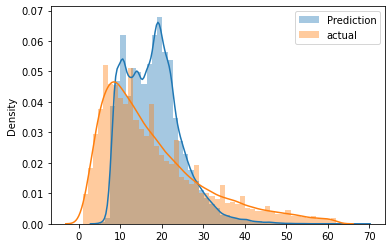

In [112]:
sns.distplot(y_pred, label="Prediction")
sns.distplot(y_train, label="actual")

plt.legend()

In [114]:
mean_squared_error(y_train, y_pred, squared=False)

10.448189712954091

In [119]:
# making it a function for easy access
def read_dataframe(filename):
    df=pd.read_parquet(filename)

    df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
    df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)

    df['duration']=df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df=df[(df.duration >= 1.0) & (df.duration <= 62)]

    categorical=['PULocationID','DOLocationID']
    #numerical=['trip_distance']

    df[categorical] = df[categorical].astype(str)
    
    return df

In [120]:
df_train=read_dataframe("https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-01.parquet")
df_val=read_dataframe("https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2021-02.parquet")

In [121]:
len(df_train), len(df_val)

(74049, 62105)

In [123]:
categorical=['PULocationID','DOLocationID']
numerical=['trip_distance']

dv=DictVectorizer()

train_dicts=df_train[categorical + numerical].to_dict(orient="records")
X_train=dv.fit_transform(train_dicts)

val_dicts=df_val[categorical + numerical].to_dict(orient="records")
X_val=dv.transform(val_dicts)

In [129]:
target="duration"
y_train=df_train[target].values
y_val=df_val[target].values

In [130]:
lr=LinearRegression()
lr.fit(X_train, y_train)


y_pred=lr.predict(X_val)


mean_squared_error(y_val, y_pred, squared=False)

10.648689562900751

 Tring the lasso methods and Ridge methods

In [131]:
lr=Lasso()
lr.fit(X_train, y_train)


y_pred=lr.predict(X_val)


mean_squared_error(y_val, y_pred, squared=False)

12.423635429198791

In [135]:
# changing the parameters
lr=Lasso(alpha=0.001)
lr.fit(X_train, y_train)


y_pred=lr.predict(X_val)


mean_squared_error(y_val, y_pred, squared=False)

10.657465895945691

In [137]:
lr=Ridge(alpha=0.001)
lr.fit(X_train, y_train)


y_pred=lr.predict(X_val)


mean_squared_error(y_val, y_pred, squared=False)

11.047555605783582

In [139]:
# trying the feature combination 
df_train["PU_OD"]=df_train["PULocationID"] + '_' + df_train['DOLocationID']
df_val["PU_OD"]=df_val["PULocationID"] + '_' + df_val['DOLocationID']

In [140]:
df_val

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration,PU_OD
0,2,2021-02-01 00:34:03,2021-02-01 00:51:58,N,1.0,130,205,5.0,3.66,14.00,...,10.00,0.0,None,0.3,25.30,1.0,1.0,0.00,17.916667,130_205
1,2,2021-02-01 00:04:00,2021-02-01 00:10:30,N,1.0,152,244,1.0,1.10,6.50,...,0.00,0.0,None,0.3,7.80,2.0,1.0,0.00,6.500000,152_244
2,2,2021-02-01 00:18:51,2021-02-01 00:34:06,N,1.0,152,48,1.0,4.93,16.50,...,0.00,0.0,None,0.3,20.55,2.0,1.0,2.75,15.250000,152_48
3,2,2021-02-01 00:53:27,2021-02-01 01:11:41,N,1.0,152,241,1.0,6.70,21.00,...,0.00,0.0,None,0.3,22.30,2.0,1.0,0.00,18.233333,152_241
4,2,2021-02-01 00:57:46,2021-02-01 01:06:44,N,1.0,75,42,1.0,1.89,8.50,...,2.45,0.0,None,0.3,12.25,1.0,1.0,0.00,8.966667,75_42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64567,2,2021-02-28 22:19:00,2021-02-28 22:29:00,None,NaN,129,7,NaN,2.63,10.04,...,0.00,0.0,None,0.3,10.34,NaN,NaN,NaN,10.000000,129_7
64568,2,2021-02-28 23:18:00,2021-02-28 23:27:00,None,NaN,116,166,NaN,1.87,8.33,...,1.89,0.0,None,0.3,10.52,NaN,NaN,NaN,9.000000,116_166
64569,2,2021-02-28 23:44:00,2021-02-28 23:58:00,None,NaN,74,151,NaN,2.40,12.61,...,0.00,0.0,None,0.3,12.91,NaN,NaN,NaN,14.000000,74_151
64570,2,2021-02-28 23:07:00,2021-02-28 23:14:00,None,NaN,42,42,NaN,1.11,11.95,...,0.00,0.0,None,0.3,15.00,NaN,NaN,NaN,7.000000,42_42


In [141]:
categorical=["PU_OD"]#'PULocationID','DOLocationID']
numerical=['trip_distance']

dv=DictVectorizer()

train_dicts=df_train[categorical + numerical].to_dict(orient="records")
X_train=dv.fit_transform(train_dicts)

val_dicts=df_val[categorical + numerical].to_dict(orient="records")
X_val=dv.transform(val_dicts)

In [142]:
target="duration"
y_train=df_train[target].values
y_val=df_val[target].values

In [143]:
lr=LinearRegression()
lr.fit(X_train, y_train)


y_pred=lr.predict(X_val)


mean_squared_error(y_val, y_pred, squared=False)

7.629637511286329

In [144]:
lr=Lasso(alpha=0.001)
lr.fit(X_train, y_train)


y_pred=lr.predict(X_val)


mean_squared_error(y_val, y_pred, squared=False)

9.400594603978343

In [146]:
lr=Ridge(alpha=0.01)
lr.fit(X_train, y_train)


y_pred=lr.predict(X_val)


mean_squared_error(y_val, y_pred, squared=False)

11.548802761028712

In [148]:
lr=LinearRegression()
lr.fit(X_train, y_train)


y_pred=lr.predict(X_val)


mean_squared_error(y_val, y_pred, squared=False)

7.629637511286329

In [149]:
with open ('models/lin_reg.bin','wb') as f_out:
    pickle.dump((dv, lr), f_out)